#Introducción a la regionalización
En esta primera parte del taller vamos a trabajar con datos de la Zona Metropolitana del Valle de México, el objetivo es doble, por un lado vamos a acostumbrarnos a trabajar en este entorno y por otro lado vamos a familiarizarnos con el concepto de regiones homogéneas.

En la primera parte del taller vamos a leer los datos, estudiarlos y limpiarlos para después hacer regiones a partir de ellos. 

## I leyendo los datos
Lo primero que vamos a hacer es leer los datos de un shapefile usando la librería GeoPandas. Esta librería es una extensión para el manejo de objetos espaciales de la librería Pandas, en escencia lo que hacen estas utilerías es darnos una estructura de datos muy similar a los DataFrames de R. No entremos en demasiados detalles por ahora, en la segunda parte del taller trabajaremos un poco más a fondo con estas librerías.

In [1]:
from geopandas import GeoDataFrame
df = GeoDataFrame.from_file('datos/muns_zmvm.shp')


La primera instrucción le dice a Python que cargue la clase GeoDataFrame de la librería GeoPandas. En la segunda instrucción estamos leyendo como un GeoDataFrame el archivo colonias.shp.
Examinemos un poco el objeto que creamos:

In [2]:
df[:10]

,__gid,comercio,cvegeo,entropia,geometry,gid,nombre,ocio,pob,servicios,sum
0,2,15306,09003,-0.235600,"POLYGON ((484929.1845920058 2140362.452447552,...",1,Coyoacn,388,620416,3963,237535
1,3,8722,15002,-0.231074,"POLYGON ((511067.0957797423 2174738.123246821,...",2,Acolman,178,136558,1024,101221
2,4,5325,09004,-0.217374,"POLYGON ((472976.7377409345 2145231.648127011,...",3,Cuajimalpa de Morelos,130,186391,1031,88111
3,5,42921,09005,-0.230393,"POLYGON ((487636.7401871994 2166181.553336697,...",4,Gustavo A. Madero,872,1185770,6966,480458
4,6,19553,09006,-0.224145,"POLYGON ((494143.4423519243 2147538.450303035,...",5,Iztacalco,383,384326,2965,198208
5,7,57195,09007,-0.234123,"POLYGON ((493896.3149089404 2145168.182700506,...",6,Iztapalapa,1067,1815790,7975,629036
6,8,5892,09008,-0.205231,"POLYGON ((478132.0421402668 2138100.295443893,...",7,La Magdalena Contreras,143,239086,1161,102694
7,15,6210,15011,-0.275603,"POLYGON ((504828.4800192643 2157534.180076748,...",8,Atenco,100,56243,694,61077
8,16,15313,09013,-0.255129,"POLYGON ((489621.3045589842 2136287.910550584,...",9,Xochimilco,338,415007,2251,183045
9,18,10652,15013,-0.213104,"POLYGON ((472395.9852847552 2159213.656035664,...",10,Atizapn de Zaragoza,289,489937,1744,187763


Lo que hicimos aquí fue pedir los primeros 10 registros del DataFrame. Como pueden ver es simplemente una tabla con algunos atributos y una columna (geometry) que guarda la geometría de los objetos espaciales.

Los datos que tenemos son la población, la cantidad de viviendas, la cantidad de comercios, la cantidad de actividades relacionadas con ocio y servicios y la *entropía* de cada colonia. Esta última cantidad representa una medida de la mezcla de usos de suelo: valores menores de entropía representan mayor mezcla de usos de suelo.

Una primera cosda que podemos hacer con los datos es graficarlos como un mapa:


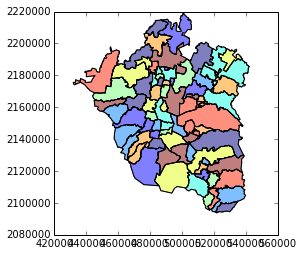

In [3]:
%matplotlib inline
df.plot()

La primera instrucción le dice a python que queremos que nos dibuje las gráficas aquí mismo, mientras que la segunda instrucción construye la gráfica. Ciertamente no es una gráfica bonita, pero la podemos trabajar un poco, por ejemplo, hacerla más grande:


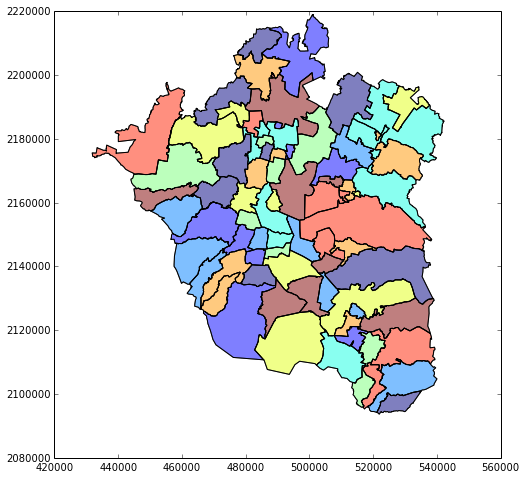

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
axes = df.plot()


Ahora tuvimos que importar la librería que se encarga de hacer la gráficas import matplotlib.pyplot as plt para poder decirle que qeríamos una gráfica más grande. Ciértamente matplotlib no es la herramienta ideal para hacer mapas, pero a veces resulta útil tenerla a la mano mientras estamos trabajando en python. Más adelante vamos a usar esta misma librería para visualizar la información de diferentes formas.
Una última cosa que podemos hacer es colorear el mapa de acuerdo a una columna particular, por ejemplo, de acuerdo a su población:


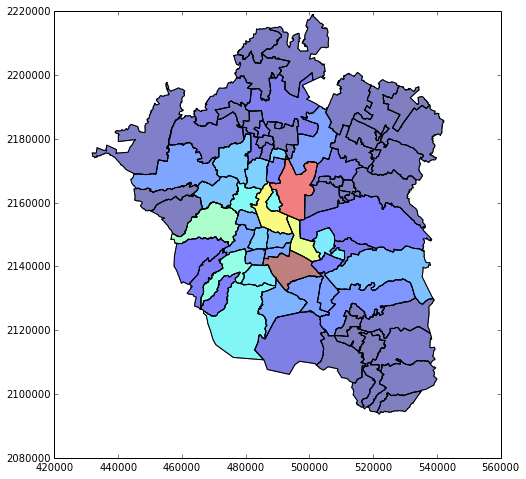

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
axes = df.plot(column='pob')

Pueden jugar con colorear los datos de diferentes maneras, pueden hacerlo directamente aquí o en Qgis que ofrece más facilidades para la visualización. Lo interesante en este momento es pensar en estas visualizaciones (coropletas) como agrupaciones de los datos de acuerdo a una característica. Por ejemplo, en el mapa de arriba, los municipios de la parte externa de la ciudad, pertenecen al mismo grupo de acuerdo a su población.

Ahora, desde un punto de vista geográfico, lo que nos interesa es saber si hay procesos de escala local (contextuales) que dan origen a la distribución espacial de las variables, para estudiar esto lo que resulta útil es el concepto de regionalización, que agrupa las unidades de acurdo a sus características y a su ubicación en el espacio.



## II Regionalizando

Para explorar el concepto de regionalización vamos a utilizar la librería [clusterpy](http://www.rise-group.org/risem/clusterpy/) que nos provee varios algoritmos para regionalizar.

En un primer ejercicio, vamos a construir regiones a partir de la variable población para comparar con los mapas que hicimos arriba:

In [6]:
import clusterpy
muns = clusterpy.importArcData("datos/muns_zmvm")
muns.cluster('arisel', ['pob'], 8, wType='rook', inits=10, dissolve=1)
muns.results[0].exportArcData('datos/regiones_1')

ClusterPy: Library of spatially constrained clustering algorithms
Loading datos/muns_zmvm.dbf
Loading datos/muns_zmvm.shp
Done
Getting variables
Variables successfully extracted
Running original Arisel algorithm
Number of areas:  75
Number of regions:  8
initial Solution:  [0, 5, 2, 4, 2, 4, 0, 5, 3, 2, 2, 1, 5, 1, 3, 3, 3, 6, 1, 2, 4, 5, 5, 5, 5, 1, 3, 5, 1, 5, 5, 1, 5, 5, 3, 1, 5, 5, 2, 5, 5, 2, 2, 5, 5, 2, 0, 1, 5, 2, 1, 0, 1, 3, 5, 2, 7, 7, 2, 5, 5, 5, 5, 3, 5, 5, 1, 5, 5, 1, 5, 5, 5, 5, 3]
initial O.F:  1.19909190034e+12
FINAL SOLUTION:  [0, 5, 2, 4, 2, 4, 0, 5, 3, 2, 2, 1, 5, 1, 3, 5, 3, 6, 1, 2, 4, 5, 5, 5, 5, 1, 3, 5, 1, 5, 5, 1, 5, 5, 5, 1, 5, 5, 2, 5, 5, 7, 2, 5, 5, 2, 0, 1, 5, 2, 1, 0, 1, 3, 5, 2, 2, 2, 2, 5, 5, 5, 5, 3, 5, 5, 1, 5, 5, 1, 5, 5, 5, 5, 3]
FINAL OF:  1.12860052913e+12
Done
Adding variables
Done
Dissolving lines
Done
Writing ESRI files
Writing DBF file
Done
ESRI files created


Lo primero que hicimos fue importar la librería *clusterpy*. En las siguientes líneas importamos los datos del *shapefile*, creamos las regiones y exportamos los datos a otro *shape*.

La linea más significativa es `muns.cluster('arisel', ['pob'], 8, wType='rook', inits=10, dissolve=1)`, donde construimos las regiones. Los parámetros que estamos pasando al método que hace las regiones son:
* `'arisel'`: este es el nombre del algoritmo de egionalización que queremos usar. La lista completa de algoritmos que implementa *clusterpy*, su descripción y referencias bibliográficas las puedes encontrar [aquí](http://www.rise-group.org/risem/clusterpy/#online-documentation).
* `['pob']`: esta es la lista (anque aquí nada más tiene un elemento) de variables que vamos a utilizar para regionalizar.
* *Número de regiones*: En cuántas regiones queremos agrupar las unidades espaciales
* `wType`: Es el tipo de vecindad que vamos a usar, puede ser *rook* o *queen*.
* `inits=10`: Número de soluciones iniciales a construir (aunque este parámetro es importante, sobre todo para la velocidad de convergencia, su explicación es compleja y por lo pronto recomiendo que lo dejen en 10)
* `dissolve=1`: El valor de 1 le indica al algoritmo que *disuelva* las geometrías de las regiones.


La documetación completa de la librería la pueden encontrar [aquí](http://www.rise-group.org/risem/clusterpy/clusterpy0_9_9/documentation.html).

Visualicen ahora las regiones resultantes en Qgis.

###Ejercicio rápido:
* Jueguen con los parámetros del algoritmo y el número de regiones





## III Generalización Vs. Detalle

Cuando regionalizamos estamos haciendo una generalización sobre el espacio, es decir, estamos asignando el mismo "valor" a áreas más grandes que con las que empezamos. Generalizar es bueno porque nos ayuda a visualizar patrones y a explicar las cosas, pero, por otro lado, al generalizar perdemos detalle y con este, perdemos profundidad en la explicación. Entonces, hay un balance entre el poder explicativo que ganamos cuando regionalizamos y la pérdida de profundidad implícita en la generalización. En esta parte del taller van a explorar un poco esta relación.

Pare este ejercicio, vamos a trabajar con el algoritmo de su preferencia, siempre y cuando este pertenezca a la familia de *Número de regiones exógeno* (es decir, que nosotros podamos determinar el número de regiones) y una variable sobre la cual regionalizar. En mi caso voy a utilizar el algoritmo *Arisel* y a la *entropía* como variable.

##Tarea
Para visualizar la pérdida de detalle van a hacer los siguiente:
* Corran el algoritmo empezando con 15 regiones y vayan disminuyendo de una en una hasta llegar a 5
* Para cada regionalización calculen la varianza total de los datos, compárenla con la varianza original y grafiquen el resultado

###Punto extra

* Intenten reproducir el dendograma que se muestra en la página 470 de la lectura de Hagget


## IV Homogeneidad

Ahora vamos a explorar la homogeneidad de las regiones que construimos. Primero vamos a observar qué tan homogeneo es el interior de una región comparado con el total de los datos, para estudiar esta cuestión lo que vamos a hacer es, tomando como base una de las regionalizaciones anteriores, vamos a calcular la siguiente medida para cada una de las regiones:

\begin{equation*}
h_i = \frac{\sigma _i^ 2}{\sigma_t ^ 2}
\end{equation*}

donde $i$ es el número de la región, $\sigma _i^ 2$ es la varianza de la *i-ésima* región y $\sigma_t ^ 2$ es la varianza total de los datos.
Para facilitarnos un poco el trabajo, vamos a utilizar una nueva opción de *clusterpy*: `dissolve=0`, esto lo que hace es decirle al algoritmo que queremos que nos conserve los polígonos originales y que sólo agregue una columna que identifique cada región, esta columna nos servirá como base para calcular estadísticas sumarias en Qgis

Lo único nuevo que necesitan aprender para esta parte del taller es hacer varias regionalizaciones sobre el mismo conjunto de datos:


In [ ]:
muns = clusterpy.importArcData("datos/muns_zmvm")
muns.cluster('arisel', ['entropia'], 12, wType='rook', inits=10, dissolve=0)

Fíjense que ahora cambiamos el valor del parámetro `dissolve=0`, esto le dice al algoritmo que no queremos que disuelva los polígonos de las regiones, que sólo nos ponga un indicador de la región a la que pertenece, de esta manera podemos calcular estadísticas sumarias en Qgis (o en Arc) agrupando por este indicador. Para ver esto, exporten como *shape* la capa que acabamos de regionalizar y ábranla en Qgis:

In [ ]:
muns.exportArcData('data/r_1')

Como pueden ver, *clusterpy* agregó el campo **Arisel_2015** con un indicador de la región a la que pertenece cada municipio. Hagamos ahora otra regionalización *sobre los mismos datos*:

In [ ]:
muns.cluster('arisel', ['entropia'], 10, wType='rook', inits=10, dissolve=0)

y volvamos a exportar la capa como *shape*:

In [ ]:
muns.exportArcData('data/r_1')

Como pueden ver ahora tenemos dos campos nuevos: **Arisel_2015** y **Arisel_2015_1** estos corresponden a la primera y segunda regionalización que hicimos *sobre la misma capa*. Fíjense que no volvimos a crear la capa  con `muns = clusterpy.importArcData("datos/muns_zmvm")`, ya que de esa manera eliminamos todo lo que habíamos hecha anteriormente (es decir, las regionalizaciones que ya llevamos hechas).

##Tarea

* Calculen $h_i$ para distintas regionalizaciones, es decir, cambien el número de regiones y/o la variable que usan y, a partir de los resultados, decidan qué variable separa mejor los datos

## Regionalizando con más variables

Hasta el momento sólo hemos hecho regionalizaciones con una variable, sin embargo lo que es realmente útil es regionalizar de acuerdo a un *vector* de variables. Los algoritmos de *clusterpy* permiten regionalizar con un numero arbitrario de variables (siempre y cuando sean numéricas), pero, para usarlo bien es necesario detenerse y observar los datos con cuidado. Para esto, el primer paso es obtener *scatterplots* de las distribuciones de los datos:

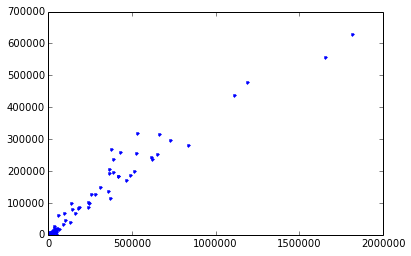

In [11]:
fig = plt.figure()
plt.plot(df['pob'].values,df['sum'].values,'b.')

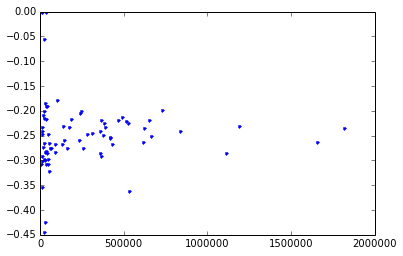

In [12]:
fig = plt.figure()
plt.plot(df['pob'].values,df['entropia'].values,'b.')

En la primera gráfica (población vs. Vivienda), vemos que la distribución de datos se parece bastante a una recta, es decir, ambas variables están fuertemente correlacionadas, mientras que en la segunda gráfica (pob vs. entropía), vemos que la distribución es bastante *aleatoria*, lo que nos indica que esas variables no están correlacionadas entre sí.

Para regionalizar preferimos usar variables que no estén muy correlacionadas entre sí, esto porque el contenido de información será mayor y por lo mismo, la separación de las regiones será mejor.

Claro que graficar los *scatterplots* resulta útil en el caso de dos variable, pero para más variables el análisis visual ya no es suficiente, entonces podemos utilizar la matriz de correlación del `DataFrame`:

In [15]:
df.corr()

,comercio,entropia,gid,ocio,pob,servicios,sum
comercio,1.000000,-0.118175,-0.258752,0.972161,0.854179,0.933764,0.914405
entropia,-0.118175,1.000000,-0.092283,-0.093540,-0.010667,-0.072722,-0.032064
gid,-0.258752,-0.092283,1.000000,-0.291845,-0.334476,-0.305897,-0.328071
ocio,0.972161,-0.093540,-0.291845,1.000000,0.898966,0.965780,0.954403
pob,0.854179,-0.010667,-0.334476,0.898966,1.000000,0.862660,0.972558
servicios,0.933764,-0.072722,-0.305897,0.965780,0.862660,1.000000,0.936847
sum,0.914405,-0.032064,-0.328071,0.954403,0.972558,0.936847,1.000000


Esta matriz nos sirve para decidir que variables, desde un punto de vista estadístico, nos sirven para regionalizar (es decir, que combinación de variables carga más información. Claro que este no es el único criterio, en el fondo los criterios más importantes vienen del objetivo para el cual queremos regionalizar.

##Tarea

Realicen una regionalización con las variables que escojan, justifiquen su elección y expliquen cualitativamente los resultados que obtengan.
En su exposición de los resultados deben de justificar no sólo la elección de los resultados, sino también el número de regiones que escogieron.

##Referencias

Locational analysis in human geography (1977): Peter Haggett. In P. Hubbard, R. Kitchin, & G. Valentine (Eds.), Key texts in human geography. (pp. 17-25). London: SAGE Publications Ltd. doi: http://dx.doi.org/10.4135/9781446213742.n3

Duque, J.C.; Dev, Boris; Betancourt, A.; Franco, J.L. (2011).ClusterPy: Library of spatially constrained clustering algorithms, Version 0.9.9. RiSE-group (Research in Spatial Economics). EAFIT University. http://www.rise-group.org.*